<a href="https://colab.research.google.com/github/madhavjk/Time_series-projects/blob/main/Passenger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install statsmodels

In [3]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('AirPassengers.csv')

In [6]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
data['Month'].head()

0    1949-01
1    1949-02
2    1949-03
3    1949-04
4    1949-05
Name: Month, dtype: object

In [8]:
data['Month']=data['Month'].apply(lambda x: dt(int(x[:4]), int(x[5:]),15))
data = data.set_index('Month')
data.head()

,#Passengers
Month,
1949-01-15,112
1949-02-15,118
1949-03-15,132
1949-04-15,129
1949-05-15,121


In [9]:
ts = data['#Passengers']

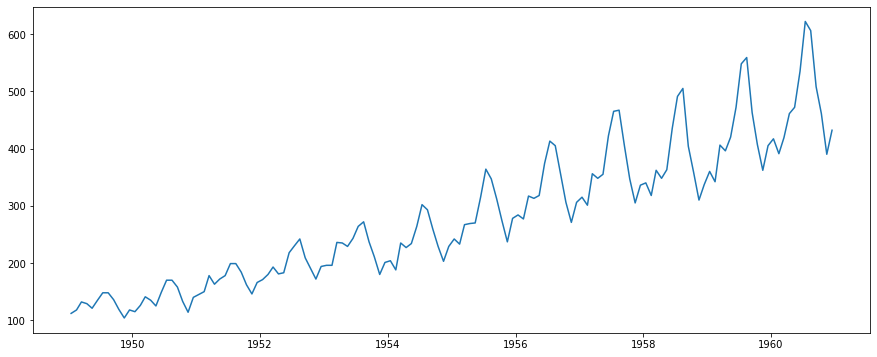

In [10]:
plt.plot(ts)

In [11]:
ts_log = np.log(ts)

**Dickey-Fuller Test**

In [29]:
def test_stationarity(timeseries):
  rolmean = timeseries.rolling(window=52,center=False).mean()
  rolstd = timeseries.rolling(window=52,center=False).std()

  orig = plt.plot(timeseries,color='blue',label='Original')
  mean = plt.plot(rolmean,color='red',label='Rolling Mean')
  std = plt.plot(rolstd,color='black',label='Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show(block=False)

  print('Results of Dickey-Fuller Test:')
  dftest = adfuller(timeseries,autolag='AIC')
  print(pd.Series(dftest))
  
  
  dfoutput = pd.Series(dftest[0:4],index =['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)   

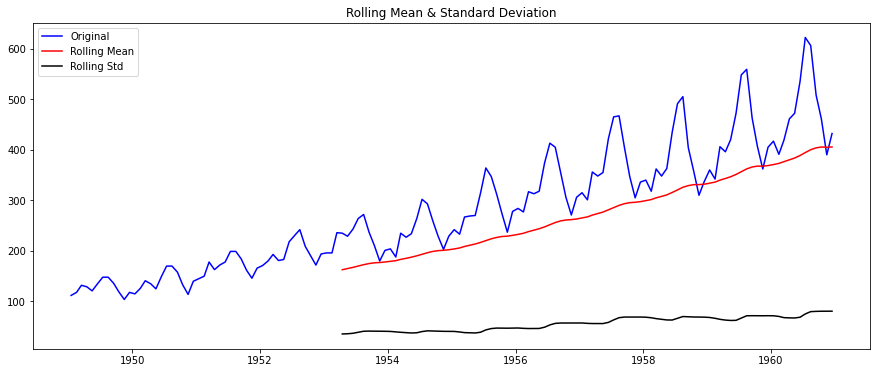

Results of Dickey-Fuller Test:
0                                             0.815369
1                                              0.99188
2                                                   13
3                                                  130
4    {'1%': -3.4816817173418295, '5%': -2.884041834...
5                                              996.693
dtype: object
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [30]:


test_stationarity(data['#Passengers'])

***Test Statistic is  greater than Critical Value, and moving avg are cnto constant over time, so null hypothesis can't be rejected.This shows time series isn't stationary.***

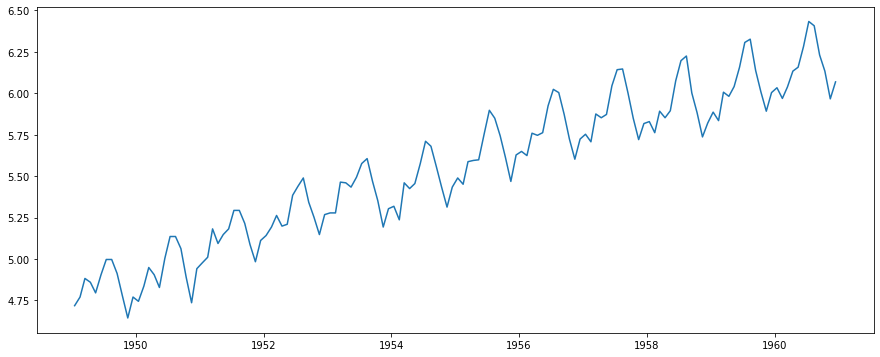

In [32]:
plt.plot(ts_log)

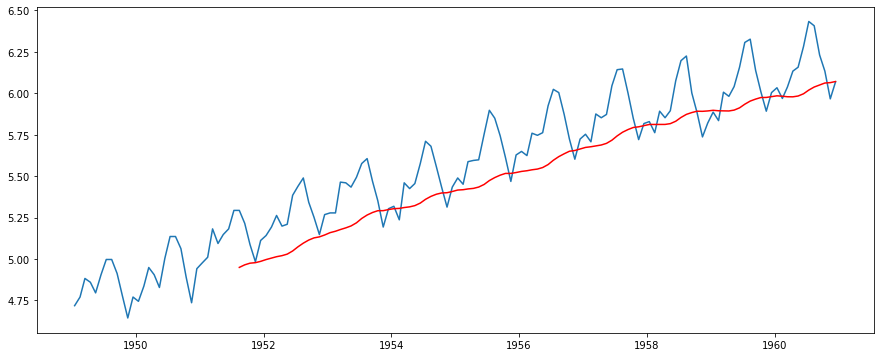

In [33]:
movingAverage = ts_log.rolling(window=32).mean()
movingSTD = ts_log.rolling(window=12).std()
plt.plot(ts_log)
plt.plot(movingAverage, color='red')

In [35]:
ts_log_mv_diff = ts_log - movingAverage
ts_log_mv_diff.head(12)

ts_log_mv_diff.dropna(inplace=True)
ts_log_mv_diff.head(10)

Month
1951-08-15    0.343842
1951-09-15    0.249959
1951-10-15    0.112716
1951-11-15    0.005576
1951-12-15    0.126077
1952-01-15    0.144944
1952-02-15    0.187247
1952-03-15    0.248684
1952-04-15    0.178201
1952-05-15    0.179914
Name: #Passengers, dtype: float64

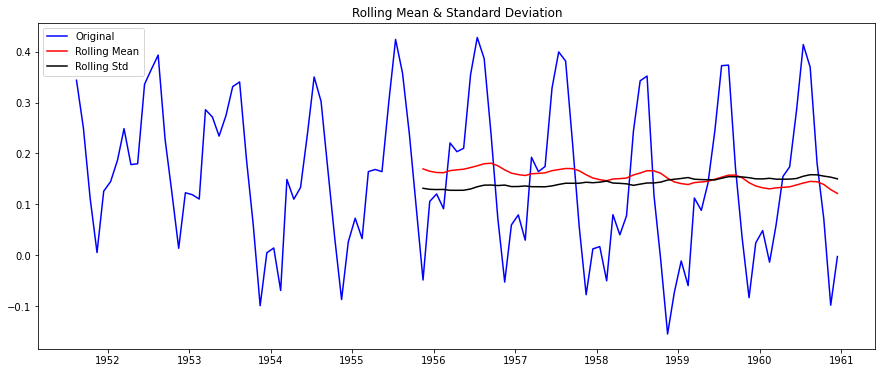

Results of Dickey-Fuller Test:
0                                             -2.45245
1                                             0.127475
2                                                   13
3                                                   99
4    {'1%': -3.498198082189098, '5%': -2.8912082118...
5                                             -364.805
dtype: object
Test Statistic                 -2.452454
p-value                         0.127475
#Lags Used                     13.000000
Number of Observations Used    99.000000
Critical Value (1%)            -3.498198
Critical Value (5%)            -2.891208
Critical Value (10%)           -2.582596
dtype: float64


In [37]:
test_stationarity(ts_log_mv_diff)

***We can reject null hypothesis, timeseries is stationary.***